# Script for map/region figure in Turbeville et al 2024

Plot of domains of DYAMOND output in tropics
with initial SST from DYAMOND runs (from ECMWF reanalysis)

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LongitudeFormatter
import pandas as pd

from utility import analysis_parameters as ap

In [7]:
var = xr.open_dataset(ap.GT + 'initial_sst.nc').sst.isel(time=0)
var

<xarray.DataArray 'sst' (lat: 60, lon: 360)>
[21600 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2020-01-20
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
Attributes:
    long_name:  Sea surface temperature
    units:      K
    code:       34
    table:      128

saved as ../plots/map_study_domains.png


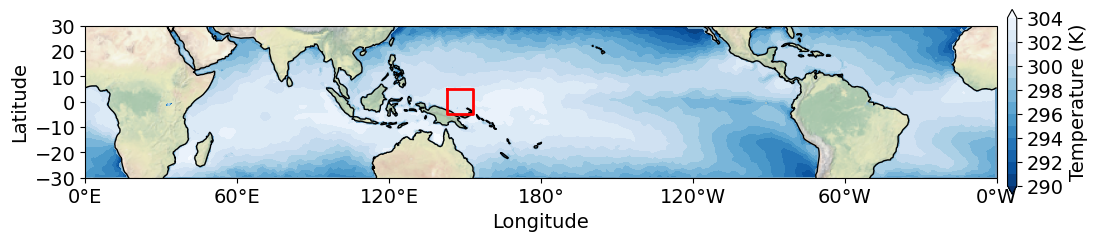

In [37]:
fig = plt.figure(figsize=(14,3))
proj = ccrs.PlateCarree(central_longitude=180)
ax = plt.axes(projection=proj)
ax.stock_img()
ax.coastlines()
cs = var.where(var>290).plot.contourf(levels=np.arange(290,305,1), extend='both',cmap='Blues_r', add_colorbar=False, transform=ccrs.PlateCarree())
# ax.plot([-3,7,7,-3,-3],[9,9,19,19,9], 'k--', lw=2)
ax.plot(np.array([143,153,153,143,143])-180,[5,5,-5,-5,5], 'r', lw=2)
# ax.plot([163,173,173,163,163],[5,5,-5,-5,5], 'k--', lw=2)
fs=16
# ax.annotate("(a)", xy=(-2.8,15), xycoords="data", fontsize=fs)
# ax.annotate("(b)", xy=(143.2,1), xycoords="data", fontsize=fs)
# ax.annotate("(c)", xy=(163.2,1), xycoords="data", fontsize=fs)
# xticks = np.arange(0,361,30)
# xlabs = []
# for x in xticks:
#     xlabs.append(str(x))
    
lon_formatter = LongitudeFormatter(zero_direction_label=True)
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_extent((-180, 180, -30, 30), crs=proj)
ax.set_xticks(ticks=np.arange(-180,181,60), minor=False)
ax.set_yticks(ticks=np.arange(-30,31,10), minor=False)
ax.set_xlabel('Longitude', fontsize=fs-2)
ax.set_ylabel('Latitude', fontsize=fs-2)
cbar = plt.colorbar(cs, shrink=0.8, ax=ax, pad=0.01)
cbar.set_label('Temperature (K)', fontsize=fs-2)
cbar.ax.tick_params(labelsize=fs-2)
plt.tick_params(labelsize=fs-2)
ax.set_title("")
plt.savefig('../plots/map_study_domains.png',dpi=200, bbox_inches="tight")
print("saved as ../plots/map_study_domains.png")
plt.show()

# plot MJO phase diagram

In [12]:
df = pd.read_csv("utility/mjo_djf2020_romi.csv", names=["year","month","day", "hour","pc1","pc2","amp"])
df.head()

,year,month,day,hour,pc1,pc2,amp
0,2019,12,1,0,1.42228,0.27763,1.44912
1,2019,12,2,0,1.37987,0.32039,1.41658
2,2019,12,3,0,1.35633,0.36036,1.40339
3,2019,12,4,0,1.23245,0.32197,1.27381
4,2019,12,5,0,1.10128,0.27779,1.13577


In [17]:
pc1s = df.pc1.values
pc2s = df.pc2.values
mos  = df.month.values
pc1s.shape, pc2s.shape

((122,), (122,))

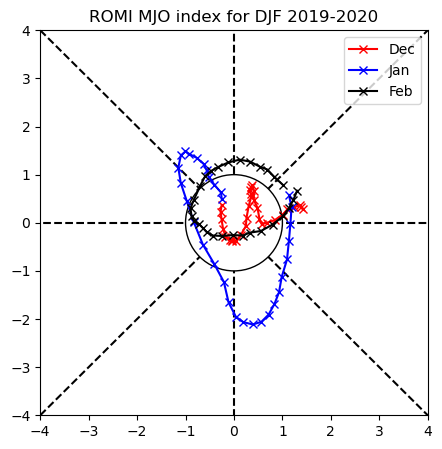

In [48]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot([-4,4],[4,-4], 'k--')
ax.axhline(0,xmin=-4,xmax=4, color='k', linestyle="--")
ax.axvline(0,ymin=-4,ymax=4, color='k', linestyle="--")
ax.plot([-4,4],[-4,4], 'k--')
circle1 = plt.Circle((0, 0), 1, fc='white', ec='k',fill=True, zorder=5)
ax.add_patch(circle1)

#month is december mos=12
ax.plot(np.where(mos==12, pc1s, np.nan), np.where(mos==12, pc2s, np.nan), color="r", marker='x', label="Dec", zorder=10)
# month is January mos==1
ax.plot(np.where(mos==1, pc1s, np.nan), np.where(mos==1, pc2s, np.nan), color="b", marker='x', label="Jan", zorder=10)
# month is January mos==2
ax.plot(np.where(mos==2, pc1s, np.nan), np.where(mos==2, pc2s, np.nan), color="k", marker='x', label="Feb", zorder=10)

# ax.annotate()
ax.set(xlim=[-4,4], ylim=[-4,4],
      title="ROMI MJO index for DJF 2019-2020")
plt.legend()
plt.show()

    